In [1]:
from imblearn.combine import SMOTETomek
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import Metode as mt

In [2]:
cancer  = pd.read_csv('filtered_data.csv')
X = cancer.drop(['diagnosis'],axis = 1)
y = cancer['diagnosis']


Prvo radimo razdvajanje trening i test skup. Nakon toga radimo resampling SMOTETomek metodom

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape,y_train.shape)
smt = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)

(378, 15) (378,)
(476, 15) (476,)


Skaliranje radimo odvojeno na trening i test podacima da ne bi doslo do "curenja informacija"

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

In [5]:
print(np.bincount(y_train_resampled))
X_train_scaled.size,y_train_resampled.size 

[238 238]


(7140, 476)

In [6]:
# Proveravamo da slucajno nema duplikata izmedju trening i test skuoa
X_train_array = np.array(X_train_scaled)
X_test_array = np.array(X_test_scaled)
print(X_train_array.size)
print(X_test_array.size)

X = np.concatenate((X_train_array, X_test_array), axis=0)
print(X.size)
X =pd.DataFrame(X)
X.duplicated().sum()

7140
2430
9570


0

Rezulati kros validacije kroz 5 iteracija: [0.96875    0.96842105 0.98947368 0.98947368 0.97894737]
Srenja vrednost: 0.9790131578947369
Accuracy:  0.9753086419753086
Recall:  0.9649122807017544
Precisions:  0.9649122807017544
F1:  0.9649122807017544
matrica:  [[103   2]
 [  2  55]]
Specificity:  0.9809523809523809
AUC-ROC: 0.97


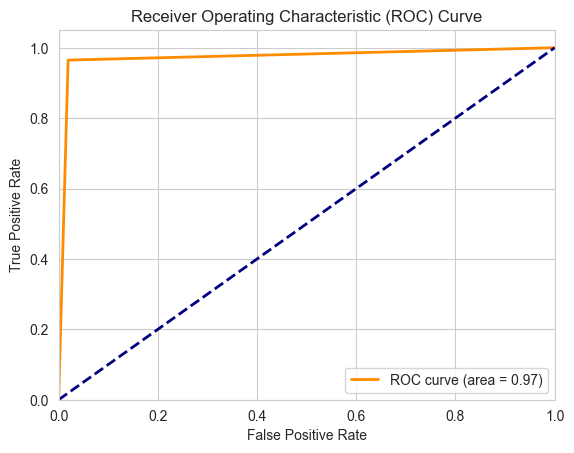

Podaci zapisani u datoteku metrike.csv


In [7]:
mt.Stacking(X_train_scaled,X_test_scaled,y_train_resampled,y_test)

In [8]:
print(np.bincount(y_test))

[105  57]


Rezulati kros validacije kroz 5 iteracija: [0.95833333 0.93684211 0.95789474 0.98947368 0.95789474]
Srenja vrednost: 0.9600877192982455
Accuracy:  0.9691358024691358
Recall:  0.9649122807017544
Precisions:  0.9482758620689655
F1:  0.9565217391304347
matrica:  [[102   3]
 [  2  55]]
Specificity:  0.9714285714285714
AUC-ROC: 0.97


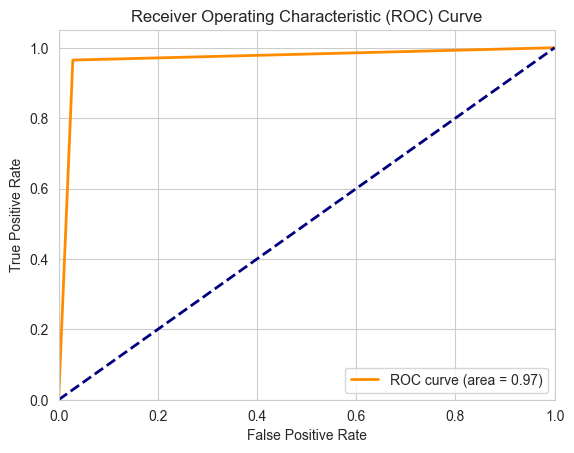

Podaci zapisani u datoteku metrike.csv


In [9]:
mt.Bagging(X_train_scaled,X_test_scaled,y_train_resampled,y_test)

Rezulati kros validacije kroz 5 iteracija: [0.97916667 0.95789474 0.98947368 1.         0.96842105]
Srenja vrednost: 0.9789912280701755
Accuracy:  0.9506172839506173
Recall:  0.9649122807017544
Precisions:  0.9016393442622951
F1:  0.9322033898305084
matrica:  [[99  6]
 [ 2 55]]
Specificity:  0.9428571428571428
AUC-ROC: 0.95


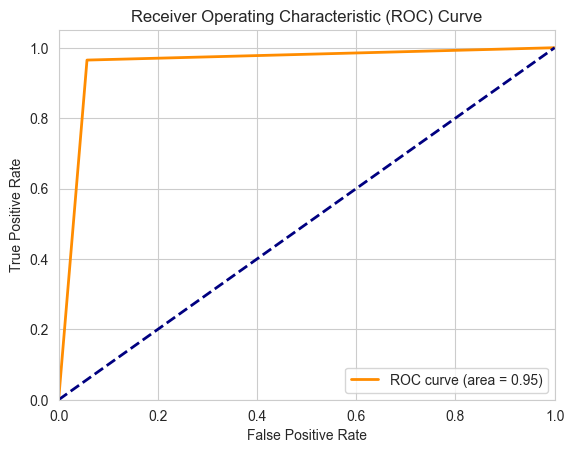

Podaci zapisani u datoteku metrike.csv


In [10]:
mt.Boosting(X_train_scaled,X_test_scaled,y_train_resampled,y_test)

Rezulati kros validacije kroz 5 iteracija: [0.97916667 0.98947368 0.96842105 1.         0.97894737]
Srenja vrednost: 0.9832017543859649


C:\Users\Korisnik\PycharmProjects\Cancer_Project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Korisnik\PycharmProjects\Cancer_Project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Korisnik\PycharmProjects\Cancer_Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Accuracy:  0.9629629629629629
Recall:  0.9298245614035088
Precisions:  0.9636363636363636
F1:  0.9464285714285715
matrica:  [[103   2]
 [  4  53]]
Specificity:  0.9809523809523809
AUC-ROC: 0.96


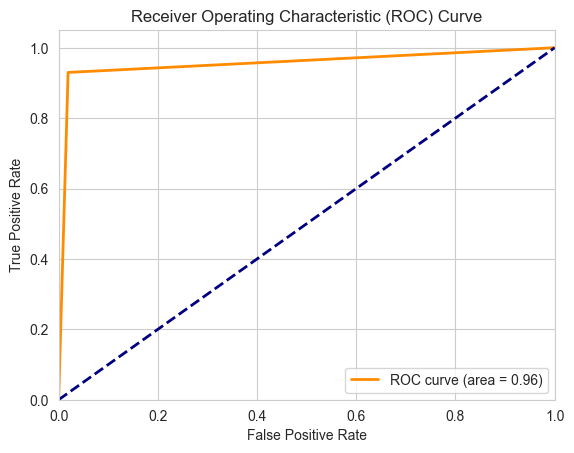

Podaci zapisani u datoteku metrike.csv


In [11]:
mt.LogistickaRegresija(X_train_scaled,X_test_scaled,y_train_resampled,y_test)


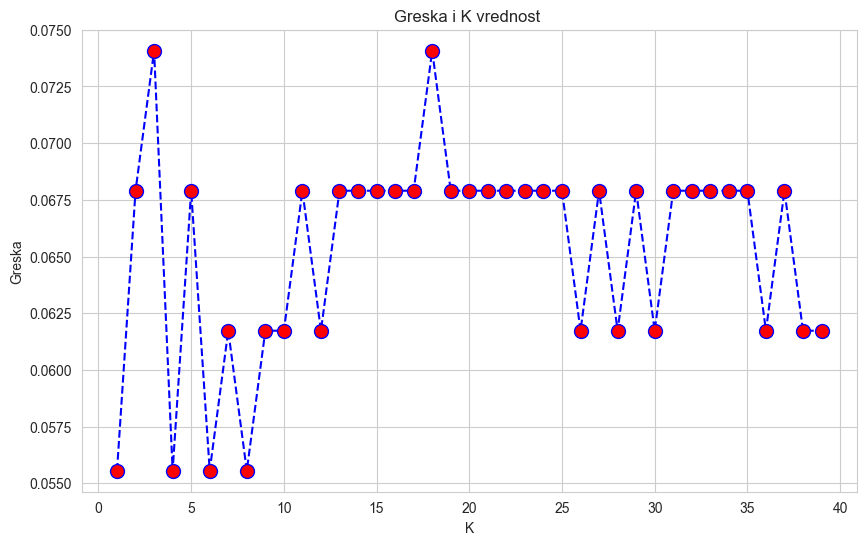

In [13]:
mt.odredjivanjeK(X_train_scaled,X_test_scaled,y_train_resampled,y_test)

Idealno uzeti za K = 6

Rezulati kros validacije kroz 5 iteracija: [0.92708333 0.92631579 0.95789474 0.96842105 0.96842105]
Srenja vrednost: 0.949627192982456
Accuracy:  0.9320987654320988
Recall:  0.9473684210526315
Precisions:  0.8709677419354839
F1:  0.9075630252100839
matrica:  [[97  8]
 [ 3 54]]
Specificity:  0.9238095238095239
AUC-ROC: 0.94


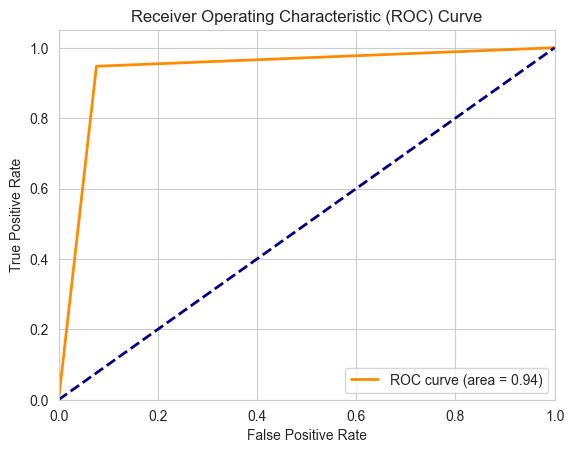

Podaci zapisani u datoteku metrike.csv


In [14]:
mt.KNN(X_train_scaled,X_test_scaled,y_train_resampled,y_test,6)

Rezulati kros validacije kroz 5 iteracija: [0.95833333 0.94736842 0.93684211 0.98947368 0.96842105]
Srenja vrednost: 0.9600877192982455
Accuracy:  0.9691358024691358
Recall:  0.9298245614035088
Precisions:  0.9814814814814815
F1:  0.954954954954955
matrica:  [[104   1]
 [  4  53]]
Specificity:  0.9904761904761905
AUC-ROC: 0.96


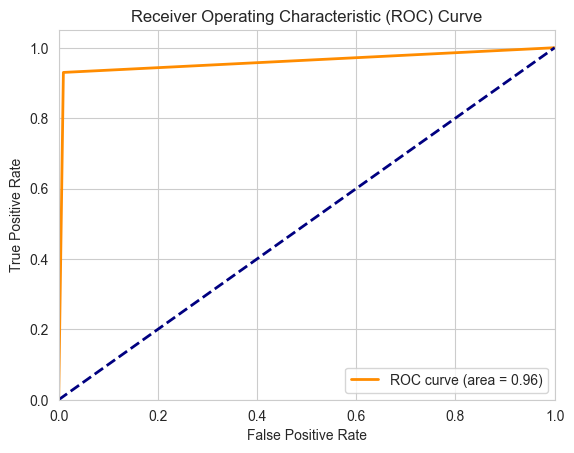

Podaci zapisani u datoteku metrike.csv


In [15]:
mt.DecisionTree(X_train_scaled,X_test_scaled,y_train_resampled,y_test)

In [1]:
metrike = pd.read_csv("metrike.csv")
metrike.head(7)

NameError: name 'pd' is not defined

Vizuelni prikaz metrika za laksu kompraciju